# Analyzing Inpatient medical expense in US

## Contents

### 1. Introduction
##### 1.1 Tableau Visualization
##### 1.2 Data source
##### 1.3 Objectives
##### 1.4 Term Explanation

### 2. Data Preparation
##### 2.1 Data Pre-processing
##### 2.2 Data Overview

### 3. Exploratory Data Analysis
##### 3.1 Total Payment by State
##### 3.2 Medicare Payment by State
##### 3.3 Coverage Rate by State
##### 3.4 Coverage Rate Findings

### 4. Conclusions

### 5. References

## 1. Introduction

#### 1.1 Tableau Visualization

https://prod-useast-a.online.tableau.com/t/soltaniehha/views/BA775_Final_project_update5/AnalysisMedicalExpenseinUS?:showAppBanner=false&:display_count=n&:showVizHome=n&:origin=viz_share_link

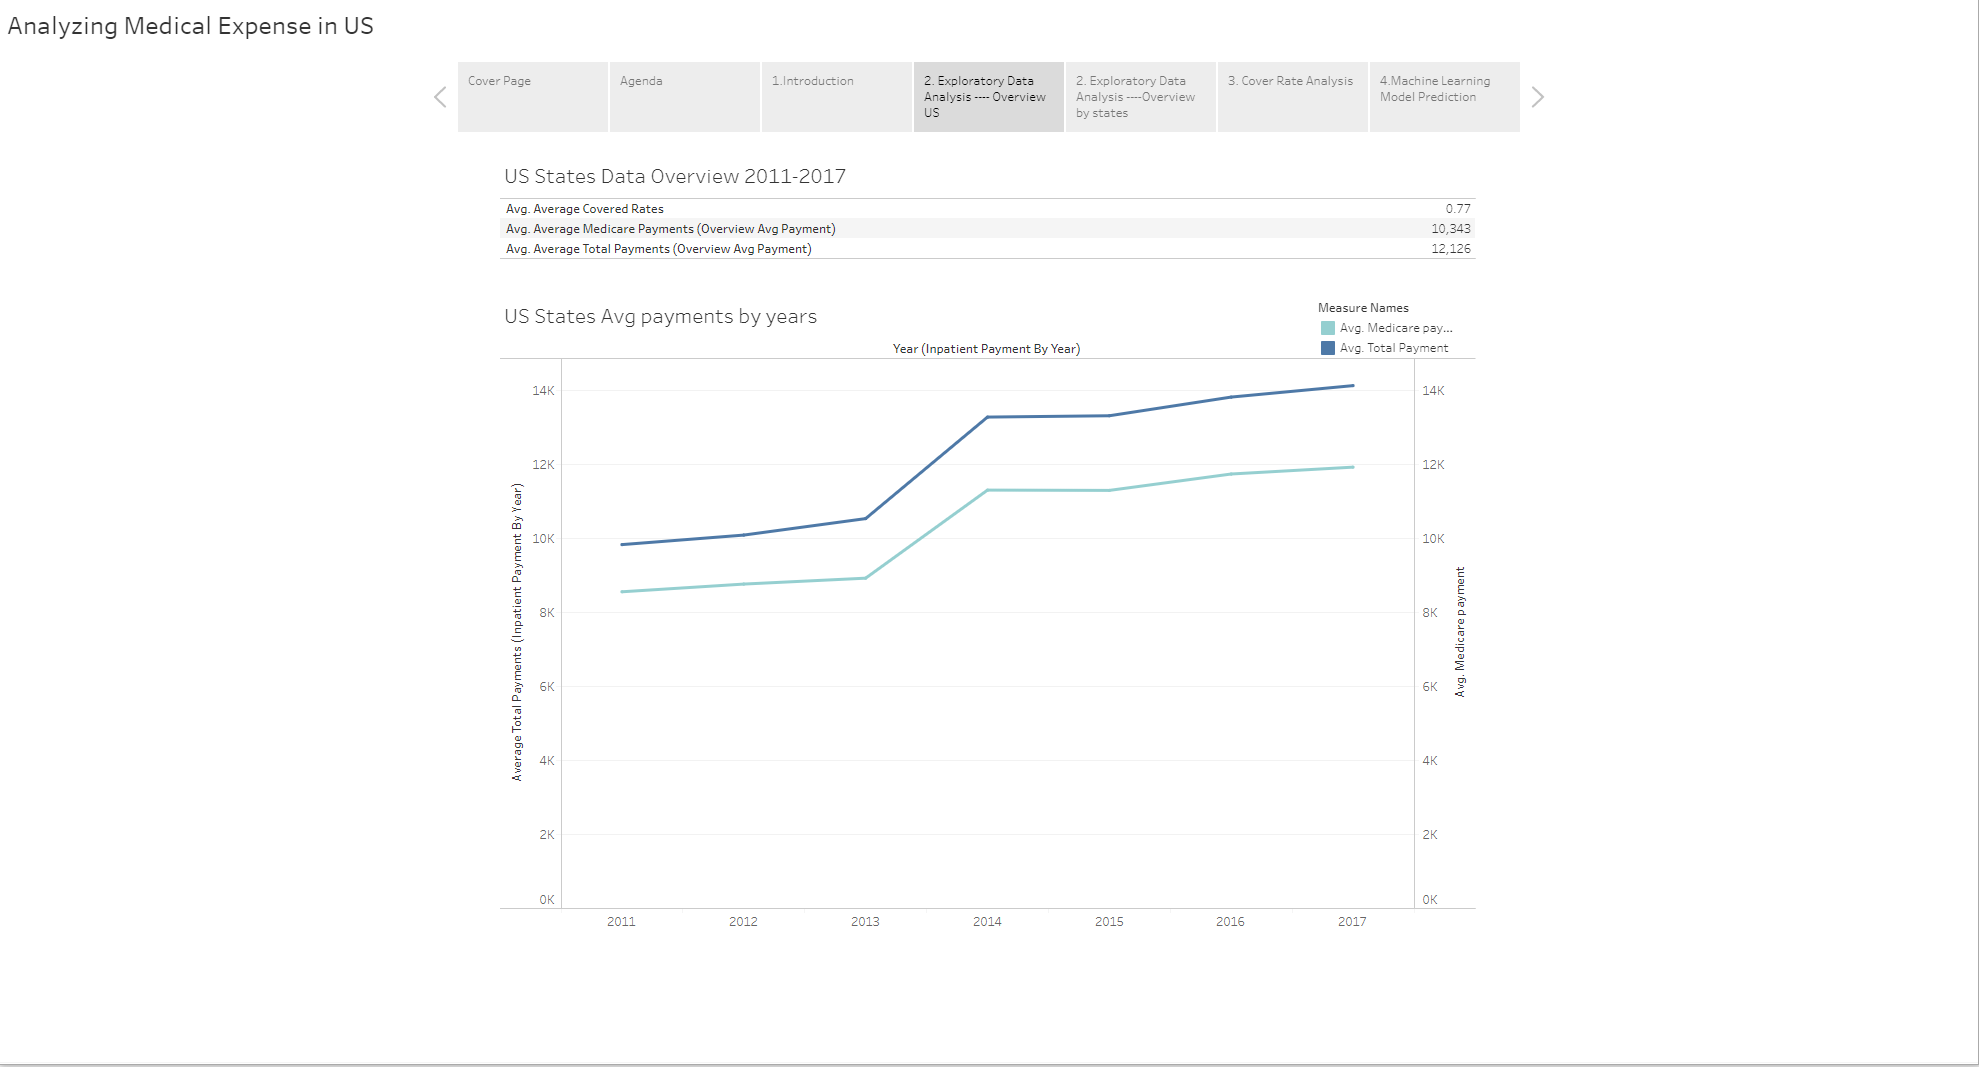

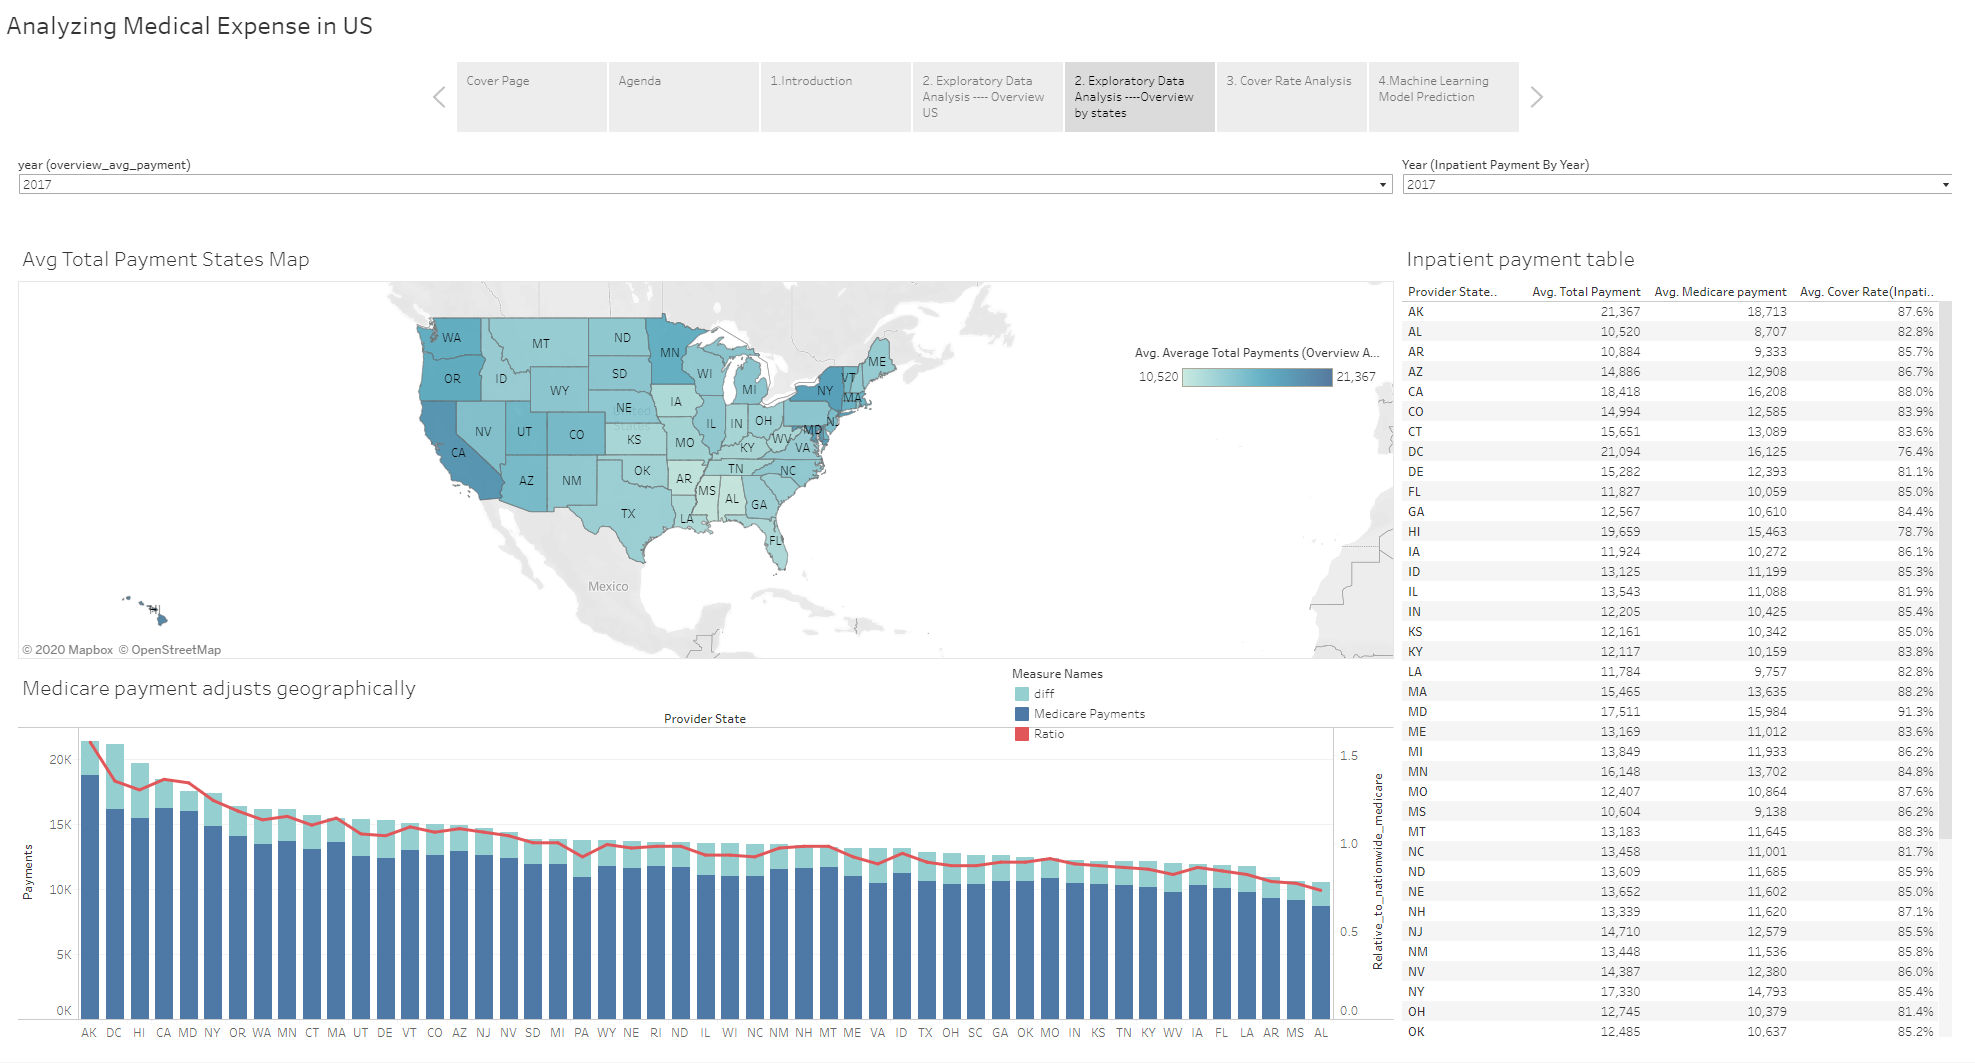

#### 1.2 Data source

We collect our data from CMS(Centers for Medicare & Medicaid Services) official website. CMS is a federal agency within the United States Department of Health and Human Services (HHS) that administers the Medicare program and works in partnership with state governments to administer Medicaid, the Children's Health Insurance Program (CHIP), and health insurance portability standards. We are going to focus on analysing the data 'Medicare Provider Utilization and Payment Data: Inpatient' from year 2011 to 2017.

#### 1.3 Objectives

Our goal is to analyze the inpatient expense of US medicare. We would like to explore the relations of covered rate, medicare charges and total payments with regions, using visualization for medical charges and payments in different states from 2011 to 2017. Based on the exploratory analysis results, we will further utilize a machine learning model to predict total payments using relevant features.

#### 1.4 Term Explanation

The following terms are 3 primary factors that we use to analyze the inpatient expense of US medicare. 
- Total payments: all expenses that the hospital charged to patients(amount of patient paid + amount of medicare paid) 
- Medicare payment: the amount of expenses that paid by Medicare
- Cover rate: Medicare payment/Total Payments


## 2. Data Preparation

#### 2.1 Data Pre-processing

For data pre-processing, we reintegrated the inpatient tables of 'cms_medicare' dataset from 'bigquery-public-data', inserted 'year' column to make it clear when we union the tables for our future analysis.

In [ ]:
%%bigquery
CREATE OR REPLACE TABLE temp.inpatient_2011 as
SELECT * ,2011 AS year 
FROM `bigquery-public-data.cms_medicare.inpatient_charges_2011`

#### 2.2 Data Overview

At the beginning, we will look at the overall average level of medical payments in the United States from 2011 to 2017.

In [21]:
%%bigquery
select round(avg(average_total_payments),2) as average_total_payments, round(avg(average_medicare_payments),2) as average_medicare_payments, round(avg(cover_rate),2) as average_covered_rates
from `ba775-team-5a.temp.inpatient_payment_by_year` 

,average_total_payments,average_medicare_payments,average_covered_rates
0,12125.73,10343.41,0.85


The table shows the average total payment through out the US from 2011 to 2017. As we mention previously, we insert a 'year' column for each inpatient table. We union the inpatient payment tables altogether and list the average total payment for each year from 2011 to 2017. We are trying to see how does the US overall average total payments change throughout the times. As the list result shows, the average total payment increased each year from 2011 to 2017, especially that there was a significant increase during the year 2013 to 2014. The reason behind this was probably due to the Patient Protection and Affordable Care Act, and commonly known as Obamacare. The act came up in 2010 and implemented in 2014. 

In [22]:
%%bigquery
SELECT year,round(avg(average_total_payments),2) as avg_total_payment 
FROM `ba775-team-5a.temp.inpatient_payment_by_year`
GROUP BY year
order by year

,year,avg_total_payment
0,2011,9816.18
1,2012,10073.76
2,2013,10518.63
3,2014,13261.38
4,2015,13297.21
5,2016,13801.74
6,2017,14111.21


## 3. Exploratory Data Analysis

#### 3.1 What is the average total payment in each state in 2017?

As the table shows, the TOP 5 average total payment states are Alaska(AK), Washington D.C(DC), Hawaii(HI), California(CA), and Maryland(MD). And the state with lowest average total cost is Alabama(AL) with $10520 in year 2017.

In [23]:
%%bigquery
SELECT provider_state, AVG(average_total_payments) as average_total_payment
FROM `ba775-team-5a.temp.inpatient_2017`
GROUP BY provider_state
ORDER BY average_total_payment desc

,provider_state,average_total_payment
0,AK,21367.491281
1,DC,21094.415680
2,HI,19658.704740
3,CA,18417.925284
4,MD,17511.093303
5,NY,17330.004594
6,OR,16354.562671
7,WA,16168.052758
8,MN,16148.006433
9,CT,15650.991243


#### 3.2 Does medicare payments adjust geographically?

After comparing the result in each state to the nationwide medicare payments, it is obvious that medicare payments adjust geographically.

In [24]:
%%bigquery
SELECT a.Provider_State,medicare_payments,b.ratio AS relative_to_nationwide
FROM `ba775-team-5a.temp.impatient_medicarepayments` AS a
FULL OUTER JOIN `ba775-team-5a.temp.inpatient_states_relative_to_nationwide_medicare` AS b
ON a.Provider_State = b.Provider_State 
Order BY medicare_payments DESC

,Provider_State,medicare_payments,relative_to_nationwide
0,AK,18712.59,1.57
1,CA,16207.74,1.36
2,DC,16125.04,1.35
3,MD,15984.23,1.34
4,HI,15462.83,1.30
5,NY,14793.43,1.24
6,OR,14075.34,1.18
7,MN,13701.57,1.15
8,MA,13635.42,1.14
9,WA,13419.41,1.13


#### 3.3 What is the inpatient coverage rate in each state?

We use medicare payments divided by total payments to get the coverage rate. We can see the coverage rate varies from state to state.

In [25]:
%%bigquery
SELECT provider_state, ROUND(SUM(Average_Medicare_Payments)/SUM(Average_Total_Payments),3) AS cover_rate
FROM `ba775-team-5a.temp.inpatient_2017`
GROUP BY provider_state
ORDER BY cover_rate DESC

,provider_state,cover_rate
0,MD,0.913
1,MT,0.883
2,MA,0.882
3,CA,0.880
4,MO,0.876
5,AK,0.876
6,NH,0.871
7,AZ,0.867
8,MI,0.862
9,MS,0.862


#### 3.4 Why are the coverage rates for each state different?

We noticed that the coverage rates for each state in 2017 ranges from 0.76 (DC) to 0.91 (MD), so we would like to find the reason for the differences. We seek to clinical conditions (DRG_Definition in data), and list the clinical conditions with the highest covered charges for states with top 5 and bottom 5 coverage rates.

Top clinical conditions for top 5 states:

In [26]:
%%bigquery
SELECT provider_state, 
  DRG_definition AS clinical_conditions,
  SUM(Average_Medicare_Payments) as total_covered_charges
FROM `ba775-team-5a.temp.inpatient_2017`
WHERE provider_state IN ('MD', 'MT', 'MA', 'CA', 'MO')
group by provider_state, DRG_definition
ORDER BY provider_state, SUM(average_total_payments) desc

,provider_state,clinical_conditions,total_covered_charges
0,CA,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,8.938661e+06
1,CA,870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,7.149665e+06
2,CA,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,7.094965e+06
3,CA,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 H...,4.215364e+06
4,CA,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,3.622862e+06
...,...,...,...
1708,MT,"087 - TRAUMATIC STUPOR & COMA, COMA <1 HR W/O ...",4.113375e+03
1709,MT,"282 - ACUTE MYOCARDIAL INFARCTION, DISCHARGED ...",3.109167e+03
1710,MT,"563 - FX, SPRN, STRN & DISL EXCEPT FEMUR, HIP,...",4.359733e+03
1711,MT,149 - DYSEQUILIBRIUM,3.515000e+03


Top clinical conditions for bottom 5 states:

In [27]:
%%bigquery
SELECT Provider_State, 
  DRG_definition AS clinical_conditions,
  SUM(Average_Medicare_Payments) as total_covered_charges
FROM `ba775-team-5a.temp.inpatient_2017`
WHERE provider_state IN ('DE', 'VA', 'PA', 'HI', 'DC')
GROUP BY Provider_State, DRG_definition
ORDER BY Provider_State, SUM(average_total_payments) desc

,Provider_State,clinical_conditions,total_covered_charges
0,DC,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,439034.308000
1,DC,"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUT...",337887.767970
2,DC,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,290908.799980
3,DC,870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,255107.603200
4,DC,981 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PR...,212531.933600
...,...,...,...
1545,VA,185 - MAJOR CHEST TRAUMA W/O CC/MCC,4063.666667
1546,VA,179 - RESPIRATORY INFECTIONS & INFLAMMATIONS W...,4731.000000
1547,VA,882 - NEUROSES EXCEPT DEPRESSIVE,4597.666667
1548,VA,072 - NONSPECIFIC CEREBROVASCULAR DISORDERS W/...,4004.307692


The clinical conditions with the most covered charges for each state are similar, including major joint replacement, septicemia, heart failure, etc. Therefore, we further examine the coverage rates for the common top clinical conditions for those 10 states, and find out that coverage rates for those clinical conditions are good indicators of overall coverage rates for each state. 

In [28]:
%%bigquery
SELECT provider_state, 
  DRG_definition AS clinical_conditions,
  ROUND(SUM(Average_Medicare_Payments)/SUM(average_total_payments),3) AS cover_rate
FROM `ba775-team-5a.temp.inpatient_2017`
WHERE provider_state IN ('MD', 'MT', 'MA', 'CA', 'MO', 'DE', 'VA', 'PA', 'HI', 'DC')
  AND DRG_definition in 
    (SELECT DRG_definition AS clinical_conditions
    FROM `ba775-team-5a.temp.inpatient_2017`
    group by DRG_definition
    ORDER BY SUM(average_total_payments) desc
    LIMIT 15)
GROUP BY provider_state, DRG_definition
ORDER BY provider_state, cover_rate DESC

,provider_state,clinical_conditions,cover_rate
0,CA,003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FA...,0.949
1,CA,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,0.937
2,CA,870 - SEPTICEMIA OR SEVERE SEPSIS W MV >96 HOURS,0.935
3,CA,981 - EXTENSIVE O.R. PROCEDURE UNRELATED TO PR...,0.932
4,CA,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,0.928
...,...,...,...
142,VA,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,0.809
143,VA,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,0.809
144,VA,330 - MAJOR SMALL & LARGE BOWEL PROCEDURES W CC,0.805
145,VA,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,0.768


#### 3.5 Forecast the average total cost for each state in 2018

The machine learning model predicts the performance of the inpatient total charged. we train the model with state, city, clinical condition, provider name and year. Moreover, We figured out the average total cost of the inpatient in each state.

In [13]:
%%bigquery
SELECT state, AVG(predicted_total_payment) AS predicted_total_payment
FROM (SELECT
*
FROM
  ml.PREDICT(MODEL `ba775-team-5a.temp.cost_model3`,
   (SELECT Provider_State AS state, provider_city AS city, DRG_Definition,  Provider_Name AS provider, 2018 AS Year, 1 AS TRAIN, 0 AS EVAL
   FROM `ba775-team-5a.temp.inpatient_2017`)))
GROUP BY state
ORDER BY predicted_total_payment DESC

,state,predicted_total_payment
0,AK,20370.882351
1,DC,19893.446638
2,HI,18978.404700
3,CA,18039.122081
4,NY,16982.581841
5,MD,16617.457038
6,OR,16146.435526
7,MN,16063.522434
8,WA,15884.363103
9,MA,15526.536503


## 4. Conclusions

Conclusions:
1. Average total payment increased through 2011-2017
2. The clinical condition is the major factor on cover rate.
3. The prediction of inpatient average total payment in 2018 is lower than the actual data in 2017.

## 5. References

Reference：https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data